# Module Preparation
This section will be in-charge of importing the various py scripts I made that are in `Utilities`

In [1]:
import sys
import os

module_dir = "../Utilities/Python Version"
sys.path.append(module_dir)

# Data Preparation

### Download Dataset from kaggle

In [2]:
import kagglehub
from pathlib import Path

path = kagglehub.dataset_download("noodulz/pokemon-dataset-1000")
path = Path(path)

print("Path to dataset files:", path)



Path to dataset files: C:\Users\Ren\.cache\kagglehub\datasets\noodulz\pokemon-dataset-1000\versions\2


### Inspect Data

In [3]:
import utils

utils.inspect_data(path)

anytree is already installed.
2
└── pokemon-dataset-1000 (2 files)
    ├── dataset
    │   ├── abomasnow (40 files)
    │   ├── abra (40 files)
    │   ├── absol (38 files)
    │   ├── accelgor (20 files)
    │   ├── aegislash-shield (16 files)
    │   ├── aerodactyl (40 files)
    │   ├── aggron (38 files)
    │   ├── aipom (40 files)
    │   ├── alakazam (40 files)
    │   ├── alcremie (13 files)
    │   ├── alomomola (20 files)
    │   ├── altaria (38 files)
    │   ├── amaura (16 files)
    │   ├── ambipom (40 files)
    │   ├── amoonguss (20 files)
    │   ├── ampharos (40 files)
    │   ├── annihilape (6 files)
    │   ├── anorith (38 files)
    │   ├── appletun (13 files)
    │   ├── applin (13 files)
    │   ├── araquanid (16 files)
    │   ├── arbok (40 files)
    │   ├── arboliva (6 files)
    │   ├── arcanine (40 files)
    │   ├── arceus (32 files)
    │   ├── archen (20 files)
    │   ├── archeops (20 files)
    │   ├── arctibax (6 files)
    │   ├── arctovish (13 files)
 

### Create Transform

In [4]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Resize((224, 224)) 
])


### Create Dataset

In [5]:
from torchvision import datasets

# Train path
train_path = path / 'pokemon-dataset-1000/train'

# Test path
test_path = path / 'pokemon-dataset-1000/test'

train_pokemon_dataset = datasets.ImageFolder(root = train_path, transform = transform)
test_pokemon_dataset = datasets.ImageFolder(root = test_path, transform = transform)

### Visualize random images

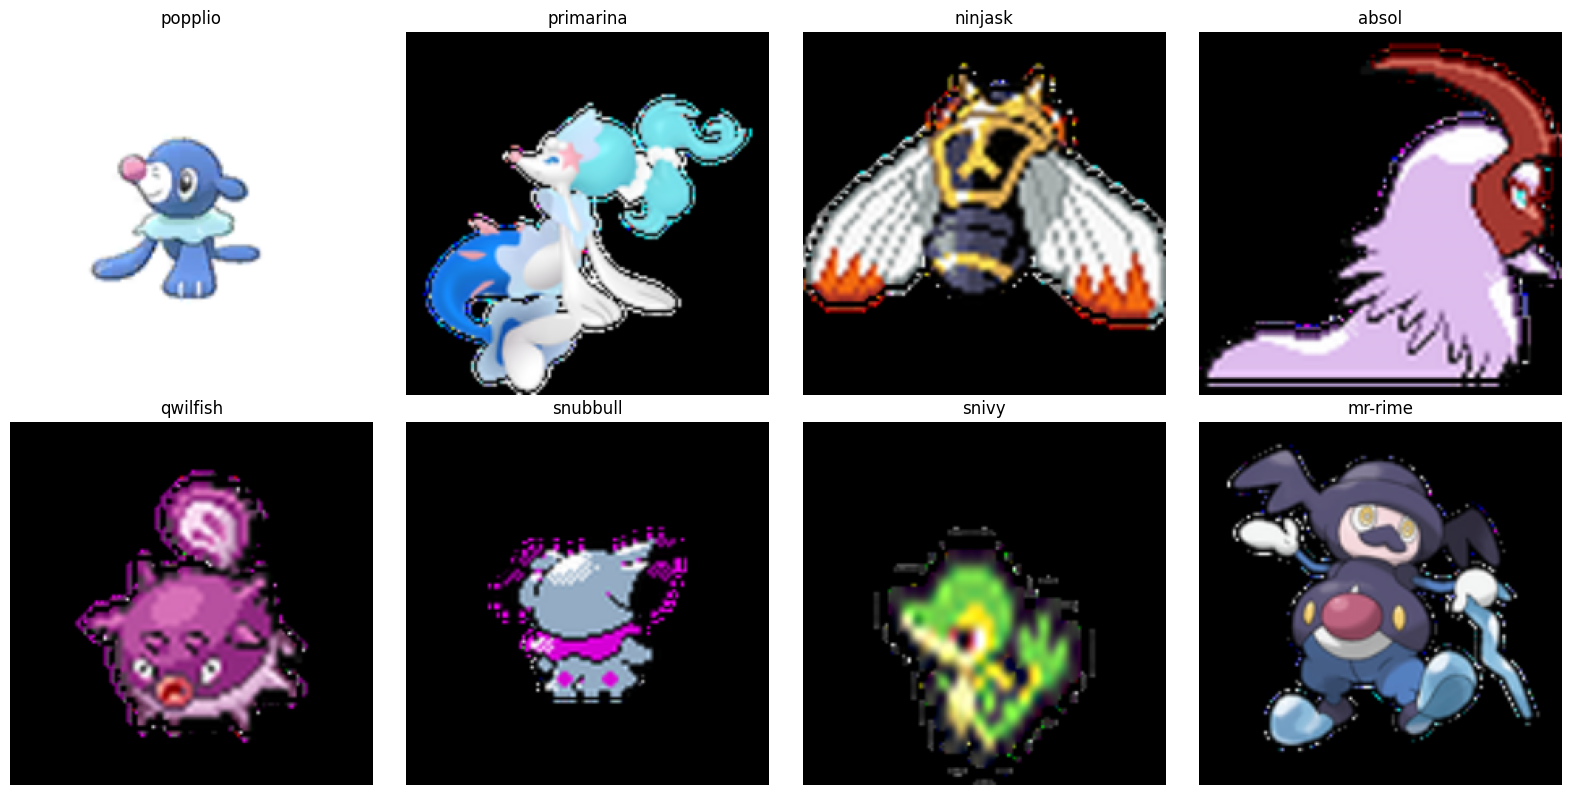

In [6]:
utils.visualize_dataset_samples(train_pokemon_dataset, num_images=8)

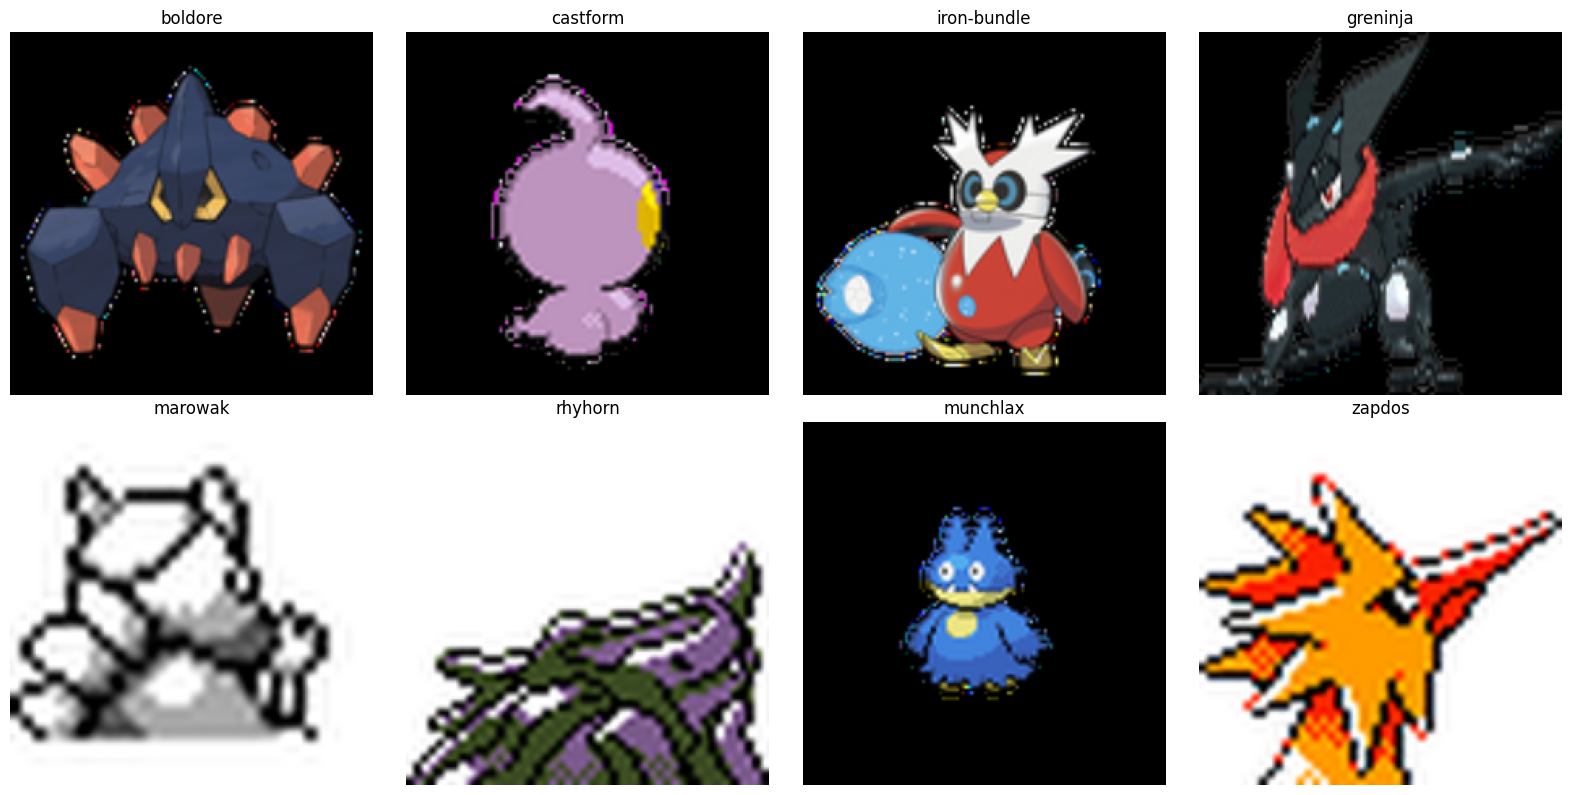

In [7]:
utils.visualize_dataset_samples(train_pokemon_dataset, num_images=8)

### Create Data Loaders

In [8]:
from torch.utils.data import DataLoader

train_pokemon_dataloader = DataLoader(
    dataset=train_pokemon_dataset,
    batch_size=32,
    shuffle=True
)

test_pokemon_dataloader = DataLoader(
    dataset=train_pokemon_dataset,
    batch_size=32,
    shuffle=False
)

# Model Training

### Device Agnostic Code

In [9]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Import Vision Transformers from Torch Vision

In [10]:
from torchvision.models import vit_b_16, vit_l_32

model0 = vit_b_16(weights=None)

### Check model info

In [11]:
from torchinfo import summary

summary(model0, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [1, 1000]                 768
├─Conv2d: 1-1                                 [1, 768, 14, 14]          590,592
├─Encoder: 1-2                                [1, 197, 768]             151,296
│    └─Dropout: 2-1                           [1, 197, 768]             --
│    └─Sequential: 2-2                        [1, 197, 768]             --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-3                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-4                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-5                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-6                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-7             

In [12]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model0.parameters(), lr=0.004, weight_decay=0.05)

In [13]:
from training_utils_vision import train_model

train_model(
    model=model0, 
    train_loader=train_pokemon_dataloader, 
    test_loader=test_pokemon_dataloader, 
    epochs=4, 
    loss_fn=loss_fn, 
    optimizer=optimizer, 
    device=device
)

Training:   0%|          | 0/4 [00:00<?, ?epoch/s]

KeyboardInterrupt: 